In [135]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stress-level-detection/Mohanty_IEEE-TCE_2019-Nov_Stress-Lysis.pdf
/kaggle/input/stress-level-detection/Stress-Lysis.csv
/kaggle/input/stress-level-detection/readme.docx


In [136]:
#read necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalAveragePooling1D, LSTM, Dense, Dropout, Flatten

In [137]:
df = pd.read_csv('/kaggle/input/stress-level-detection/Stress-Lysis.csv')
y = df['Stress Level']
X = df.drop('Stress Level', axis=1)

In [138]:
print(df.describe())

          Humidity  Temperature   Step count  Stress Level
count  2001.000000  2001.000000  2001.000000   2001.000000
mean     20.000000    89.000000   100.141429      1.104448
std       5.777833     5.777833    58.182948      0.771094
min      10.000000    79.000000     0.000000      0.000000
25%      15.000000    84.000000    50.000000      0.000000
50%      20.000000    89.000000   101.000000      1.000000
75%      25.000000    94.000000   150.000000      2.000000
max      30.000000    99.000000   200.000000      2.000000


In [139]:
from keras.layers import Bidirectional, LSTM, Conv1D, MaxPooling1D, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the model
model = Sequential()

# CNN layers
model.add(Conv1D(filters=128, kernel_size=3, activation='relu', padding='same', input_shape=(X.shape[1], 1)))
model.add(MaxPooling1D(pool_size=1))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling1D(pool_size=1))
# model.add(Flatten())

# GRU layers with dropoutmodel.add(GRU(64, activation='tanh', recurrent_activation='sigmoid', return_sequences=True))
model.add(Bidirectional(LSTM(256, return_sequences=False)))
model.add(Dropout(0.4))

early_stopping = EarlyStopping(monitor='val_loss', patience=12, restore_best_weights=True)
 
# Fully connected layers
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))  # Increased dropout for regularization
model.add(Dense(8, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [141]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=128,callbacks=[early_stopping])

Epoch 1/100
11/11 [==============================] - 7s 152ms/step - loss: 0.9006 - accuracy: 0.5964 - val_loss: 0.4431 - val_accuracy: 0.7704
Epoch 2/100
11/11 [==============================] - 0s 45ms/step - loss: 0.5027 - accuracy: 0.7343 - val_loss: 0.4200 - val_accuracy: 0.7671
Epoch 3/100
11/11 [==============================] - 1s 53ms/step - loss: 0.4476 - accuracy: 0.7600 - val_loss: 0.4011 - val_accuracy: 0.7338
Epoch 4/100
11/11 [==============================] - 0s 45ms/step - loss: 0.4176 - accuracy: 0.7564 - val_loss: 0.3530 - val_accuracy: 0.8369
Epoch 5/100
11/11 [==============================] - 0s 46ms/step - loss: 0.4008 - accuracy: 0.7643 - val_loss: 0.3620 - val_accuracy: 0.7837
Epoch 6/100
11/11 [==============================] - 1s 51ms/step - loss: 0.3740 - accuracy: 0.7907 - val_loss: 0.3025 - val_accuracy: 0.9185
Epoch 7/100
11/11 [==============================] - 1s 55ms/step - loss: 0.3194 - accuracy: 0.8250 - val_loss: 0.2621 - val_accuracy: 0.8702
Epoch

In [142]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

19/19 [==============================] - 0s 8ms/step - loss: 0.0047 - accuracy: 1.0000
Test Loss: 0.0047
Test Accuracy: 1.0000


In [143]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

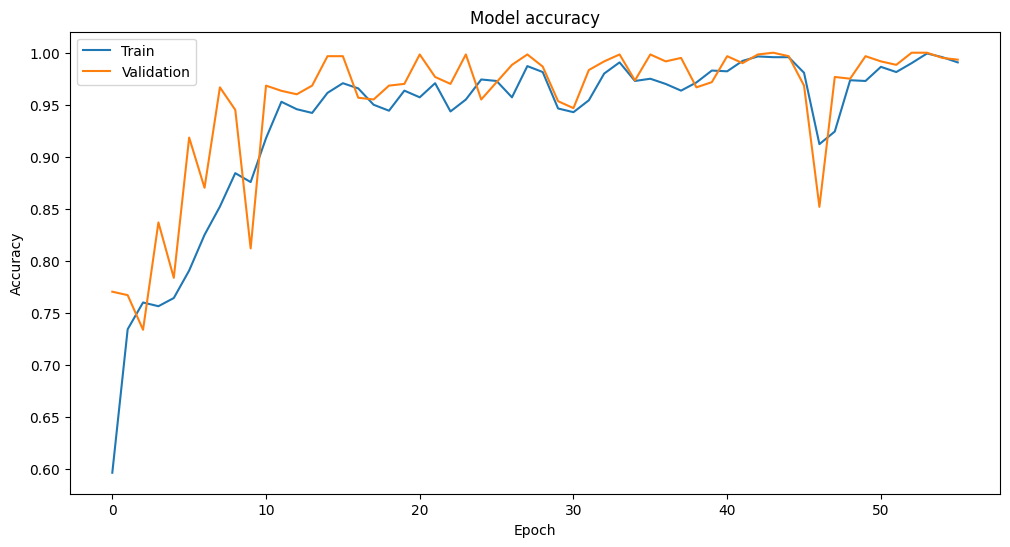

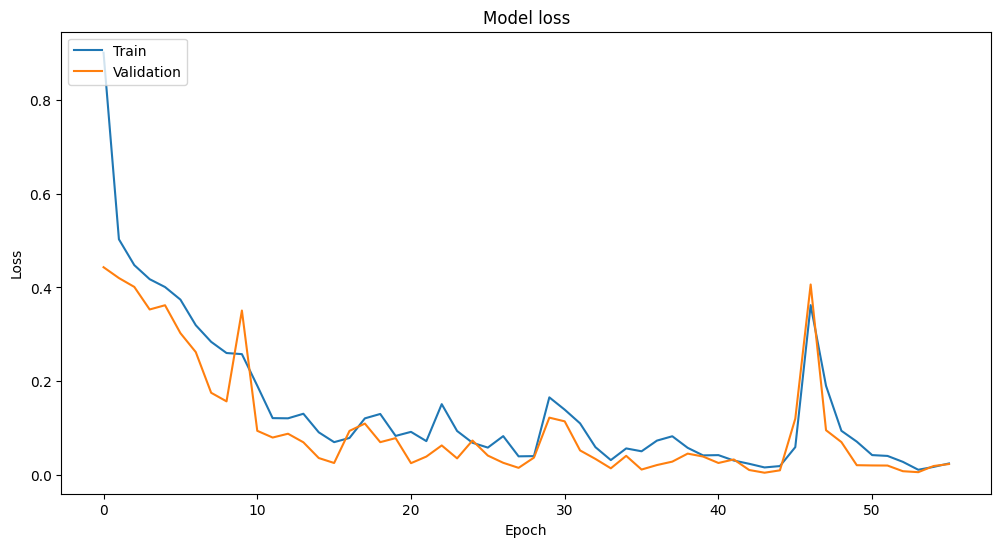

In [144]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

19/19 [==============================] - 1s 8ms/step


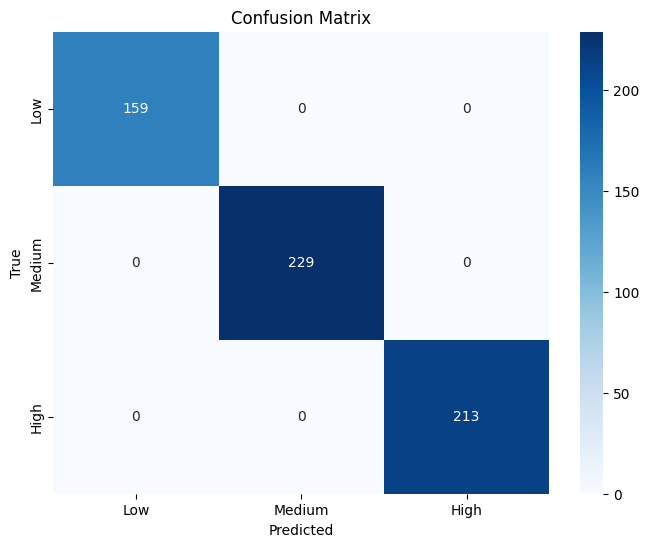

In [145]:
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

# Plot the confusion matrix
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
plot_confusion_matrix(y_test, y_pred, classes=['Low', 'Medium', 'High'])